$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$

# Quantum gates
Quantum gates are represented by **unitary matrices**.

* A complex square matrix U is said to be unitary if $U^{\dagger}U = I$. 
* A unitary matrix U has $|\det U| = 1$.


**Quantum instruction glossary from IBM QX**: https://quantum-computing.ibm.com/docs/circ-comp/q-gates.

## Table of contents:
* [Hadamard Gate](#hadamard_gate)
* [X Gate (NOT)](#x_gate)
* [Y Gate](#y_gate)
* [Z Gate](#z_gate)
* [S Gate](#s_gate)
* [T Gate](#t_gate)
* [S<sup>†</sup> Gate](#sdg_gate)
* [T<sup>†</sup> Gate](#tdg_gate)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3, suppress=True, floatmode='fixed', sign='+')

In [2]:
zero_qubit = np.array([1, 0]).T
one_qubit = np.array([0, 1]).T

plus_qubit = 1 / np.sqrt(2) * np.array([1, 1]).T
minus_qubit = 1 / np.sqrt(2) * np.array([1, -1]).T

cw_qubit = 1 / np.sqrt(2) * np.array([1, 1.0j]).T
ccw_qubit = 1 / np.sqrt(2) * np.array([1, -1.0j]).T

In [3]:
def plot_qubit(plot, qubit, color, label=None):
    H = 1 / np.sqrt(2) * np.array([[1.0, 1.0],
                               [1.0, -1.0]], dtype=np.complex64)
    Sdg = np.array([[1.0, 0.0],
                [0.0, -1.0j]], dtype=np.complex64)
    
    def get_x():
        """
        Write the qubit as a linear combination in the basis |+⟩, |-⟩:
        |v⟩ = a|+⟩ + b|-⟩ = a(H|0⟩) + b(H|1⟩)
        Project |v⟩ on |+⟩ and |-⟩:
        a = ⟨+|v⟩ = ⟨0|H'|v⟩ = a⟨0|H'H|0⟩ = a
        b = ⟨-|v⟩ = ⟨1|H'|v⟩ = a⟨1|H'H|1⟩ = b
        """
        qubit_x_basis = H @ qubit
        probs = qubit_x_basis.conj() * qubit_x_basis
        return (probs[0] - probs[1]).real

    def get_y():
        """
        Write the qubit as a linear combination in the basis |↺⟩, |↻⟩:
        |v⟩ = a|↻⟩ + b|↺⟩ = a(SH|0⟩) + b(SH|1⟩)
        Project |v⟩ on |↺⟩ and |↻⟩:
        a = ⟨↻|v⟩ = ⟨0|H'S'|v⟩ = a⟨0|H'S'SH|0⟩ = a
        b = ⟨↺|v⟩ = ⟨1|H'S'|v⟩ = a⟨1|H'S'SH|1⟩ = b
        """
        qubit_y_basis = H @ Sdg @ qubit
        probs = qubit_y_basis.conj() * qubit_y_basis
        return (probs[0] - probs[1]).real

    def get_z():
        qubit_z_basis = qubit
        probs = qubit_z_basis.conj() * qubit_z_basis
        return (probs[0] - probs[1]).real
    
    x, y, z = get_x(), get_y(), get_z()
    plot.quiver(0, 0, 0, x, y, z, length=1, color=color,
                arrow_length_ratio=0.1, label=label)


def draw_bloch_sphere(plot):
    # draw the Bloch sphere
    u, v = np.mgrid[0:2 * np.pi:250 * 1.0j, 0:np.pi:(250 / 2) * 1.0j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    plot.plot_wireframe(x, y, z, color="k", alpha=.01, rcount=100, ccount=100)
    plot.grid(False)

    plot.set_xlim([-1, 1])
    plot.set_ylim([-1, 1])
    plot.set_zlim([-1, 1])

    plot.view_init(azim=20)
    return plot

In [4]:
def plot_gate(q0, l0, q1, l1):
    """
    Plot two horizontally adjacent Bloch spheres.
    Draw q0 in the first plot and q1 in the second.
    """
    fig = plt.figure(figsize=(12, 4))
    
    plots = []
    for i in range(2):
        plots.append(fig.add_subplot('12' + str(i + 1), projection='3d'))
        plots[i].locator_params(nbins=5)
        draw_bloch_sphere(plots[i])
        
    plot_qubit(plots[0], q0, color='xkcd:black', label=l0)
    plot_qubit(plots[1], q1, color='xkcd:red', label=l1)
    
    for i in range(2):
        plots[i].legend(loc="upper left")

## Hadamard Gate <a class="anchor" id="hadamard_gate"></a>
$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1\\
1 & -1
\end{bmatrix}
$$

H|0⟩ = [+0.707+0.000j +0.707+0.000j] = |+⟩
H|1⟩ = [+0.707+0.000j -0.707+0.000j] = |-⟩


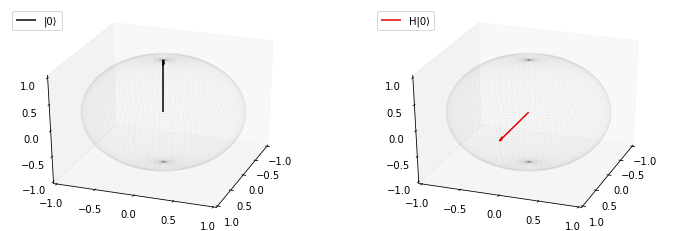

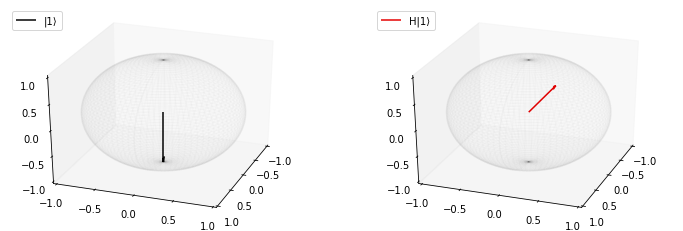

In [5]:
H = 1 / np.sqrt(2) * np.array([[1.0, 1.0],
                               [1.0, -1.0]], dtype=np.complex64)

print("H|0⟩ =", H @ zero_qubit, "= |+⟩")
print("H|1⟩ =", H @ one_qubit, "= |-⟩")

plot_gate(zero_qubit, '|0⟩', H @ zero_qubit, 'H|0⟩')
plot_gate(one_qubit, '|1⟩', H @ one_qubit, 'H|1⟩')

H|+⟩ = [+1.000+0.000j +0.000+0.000j] = |0⟩
H|-⟩ = [+0.000+0.000j +1.000+0.000j] = |1⟩


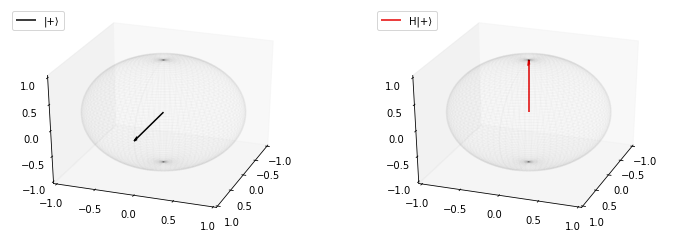

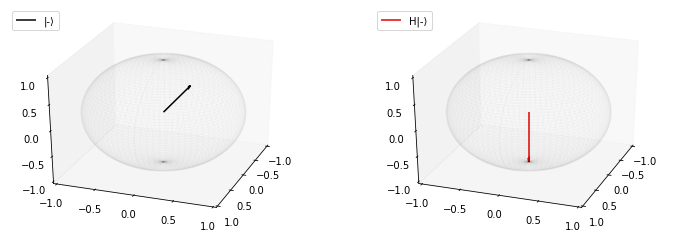

In [6]:
print("H|+⟩ =", H @ plus_qubit, "= |0⟩")
print("H|-⟩ =", H @ minus_qubit, "= |1⟩")

plot_gate(plus_qubit, '|+⟩', H @ plus_qubit, 'H|+⟩')
plot_gate(minus_qubit, '|-⟩', H @ minus_qubit, 'H|-⟩')

H|↻⟩ = [+0.500+0.500j +0.500-0.500j] = |↺⟩
H|↺⟩ = [+0.500-0.500j +0.500+0.500j] = |↻⟩


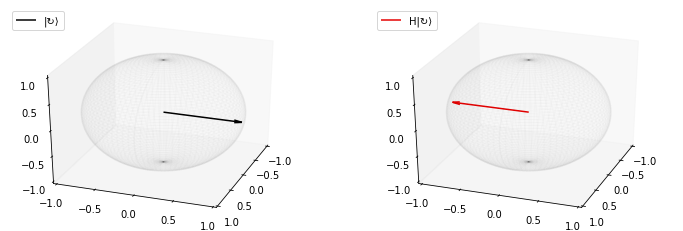

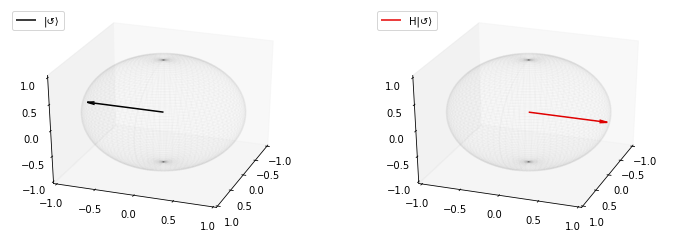

In [7]:
print("H|↻⟩ =", H @ cw_qubit, "= |↺⟩")
print("H|↺⟩ =", H @ ccw_qubit, "= |↻⟩")

plot_gate(cw_qubit, '|↻⟩', H @ cw_qubit, 'H|↻⟩')
plot_gate(ccw_qubit, '|↺⟩', H @ ccw_qubit, 'H|↺⟩')

## X gate <a class="anchor" id="x_gate"></a>
$$
X =
\begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}
$$

X|0⟩ = [+0.000+0.000j +1.000+0.000j] = |1⟩
X|1⟩ = [+1.000+0.000j +0.000+0.000j] = |0⟩


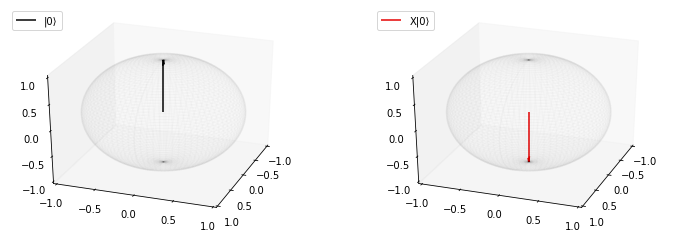

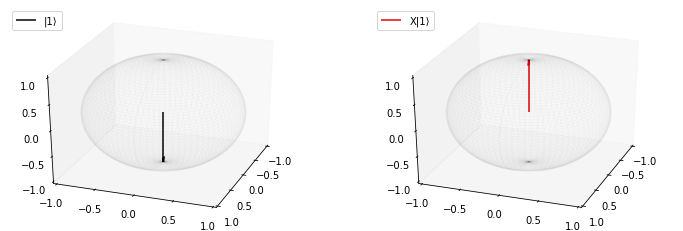

In [8]:
X = np.array([[0.0, 1.0],
              [1.0, 0.0]], dtype=np.complex64)

print("X|0⟩ =", X @ zero_qubit, "= |1⟩")
print("X|1⟩ =", X @ one_qubit, "= |0⟩")

plot_gate(zero_qubit, '|0⟩', X @ zero_qubit, 'X|0⟩')
plot_gate(one_qubit, '|1⟩', X @ one_qubit, 'X|1⟩')

X|+⟩ = [+0.707+0.000j +0.707+0.000j] = |+⟩
X|-⟩ = [-0.707+0.000j +0.707+0.000j] = |-⟩


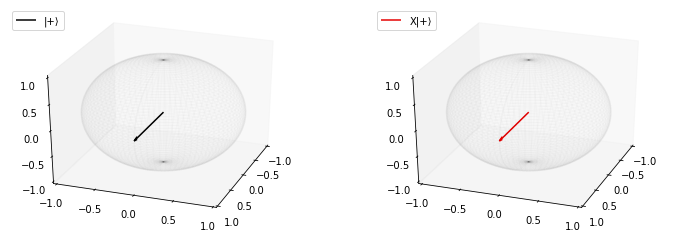

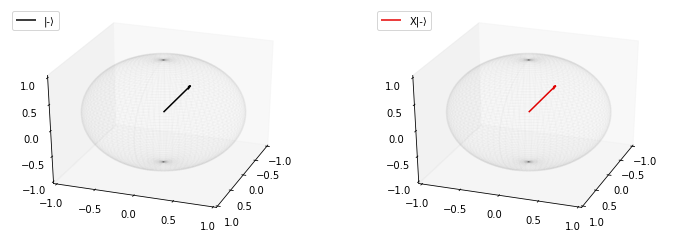

In [9]:
print("X|+⟩ =", X @ plus_qubit, "= |+⟩")
print("X|-⟩ =", X @ minus_qubit, "= |-⟩")

plot_gate(plus_qubit, '|+⟩', X @ plus_qubit, 'X|+⟩')
plot_gate(minus_qubit, '|-⟩', X @ minus_qubit, 'X|-⟩')

X|↻⟩ = [+0.000+0.707j +0.707+0.000j] = |↺⟩
X|↺⟩ = [+0.000-0.707j +0.707+0.000j] = |↻⟩


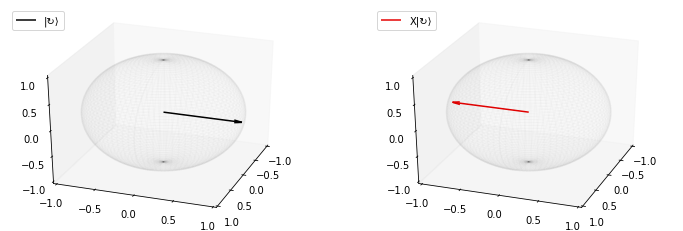

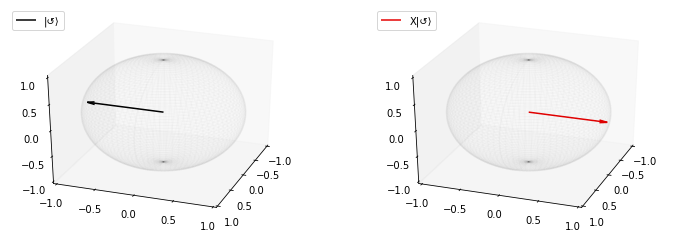

In [10]:
print("X|↻⟩ =", X @ cw_qubit, "= |↺⟩")
print("X|↺⟩ =", X @ ccw_qubit, "= |↻⟩")

plot_gate(cw_qubit, '|↻⟩', X @ cw_qubit, 'X|↻⟩')
plot_gate(ccw_qubit, '|↺⟩', X @ ccw_qubit, 'X|↺⟩')

## Y GATE <a class="anchor" id="y_gate"></a>
$$
Y =
\begin{bmatrix}
0 & -i\\
i & 0
\end{bmatrix}
$$

Y|0⟩ = [+0.000+0.000j +0.000+1.000j] = i|1⟩
Y|1⟩ = [+0.000-1.000j +0.000+0.000j] = |0⟩


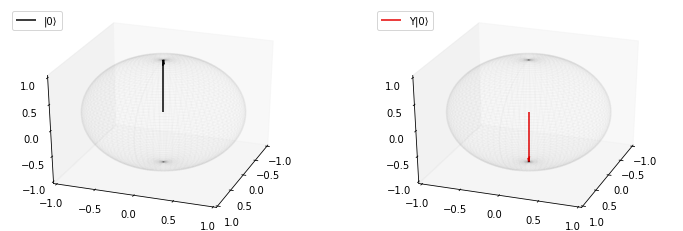

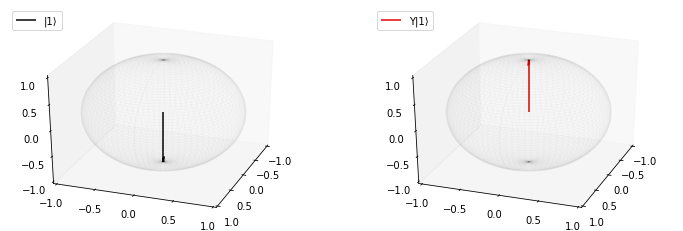

In [11]:
Y = np.array([[0.0, -1.0j],
              [1.0j, 0.0]], dtype=np.complex64)

print("Y|0⟩ =", Y @ zero_qubit, "= i|1⟩")
print("Y|1⟩ =", Y @ one_qubit, "= |0⟩")

plot_gate(zero_qubit, '|0⟩', Y @ zero_qubit, 'Y|0⟩')
plot_gate(one_qubit, '|1⟩', Y @ one_qubit, 'Y|1⟩')

Y|+⟩ = [+0.000-0.707j +0.000+0.707j] = |-⟩
Y|-⟩ = [+0.000+0.707j +0.000+0.707j] = |+⟩


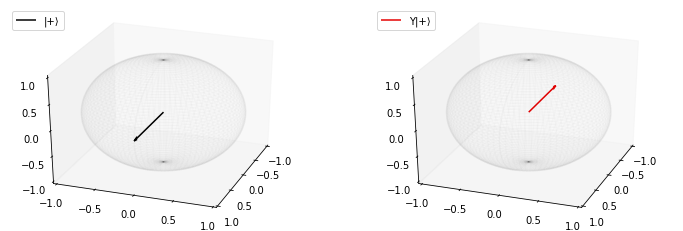

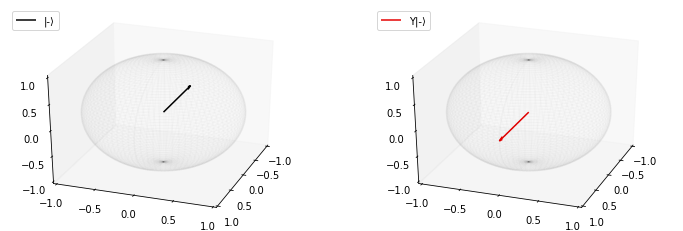

In [12]:
print("Y|+⟩ =", Y @ plus_qubit, "= |-⟩")
print("Y|-⟩ =", Y @ minus_qubit, "= |+⟩")

plot_gate(plus_qubit, '|+⟩', Y @ plus_qubit, 'Y|+⟩')
plot_gate(minus_qubit, '|-⟩', Y @ minus_qubit, 'Y|-⟩')

Y|↻⟩ = [+0.707+0.000j +0.000+0.707j] = |↻⟩
Y|↺⟩ = [-0.707+0.000j +0.000+0.707j] = |↺⟩


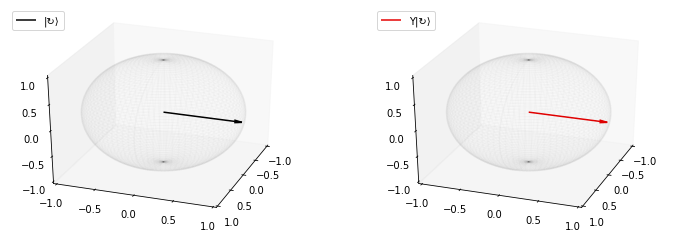

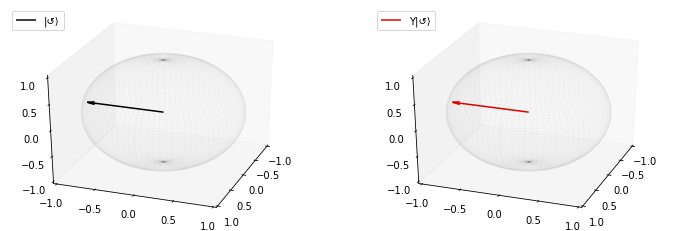

In [13]:
print("Y|↻⟩ =", Y @ cw_qubit, "= |↻⟩")
print("Y|↺⟩ =", Y @ ccw_qubit, "= |↺⟩")

plot_gate(cw_qubit, '|↻⟩', Y @ cw_qubit, 'Y|↻⟩')
plot_gate(ccw_qubit, '|↺⟩', Y @ ccw_qubit, 'Y|↺⟩')

## Z GATE <a class="anchor" id="z_gate"></a>
$$
Z =
\begin{bmatrix}
1 & 0\\
0 & -1
\end{bmatrix}
$$

Z|0⟩ = [+1.000+0.000j +0.000+0.000j] = |0⟩
Z|1⟩ = [+0.000+0.000j -1.000+0.000j] = -|1⟩


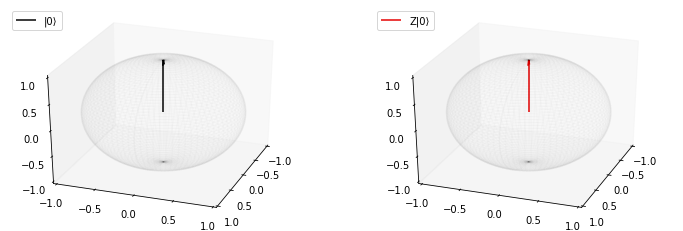

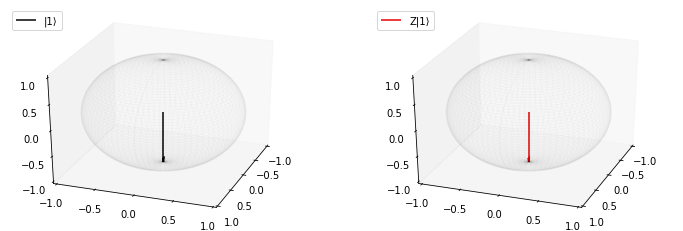

In [14]:
Z = np.array([[1.0, 0.0],
              [0.0, -1.0]], dtype=np.complex64)

print("Z|0⟩ =", Z @ zero_qubit, "= |0⟩")
print("Z|1⟩ =", Z @ one_qubit, "= -|1⟩")

plot_gate(zero_qubit, '|0⟩', Z @ zero_qubit, 'Z|0⟩')
plot_gate(one_qubit, '|1⟩', Z @ one_qubit, 'Z|1⟩')

Z|+⟩ = [+0.707+0.000j -0.707+0.000j] = |-⟩
Z|-⟩ = [+0.707+0.000j +0.707+0.000j] = |+⟩


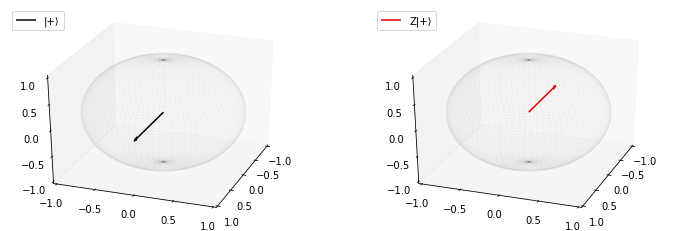

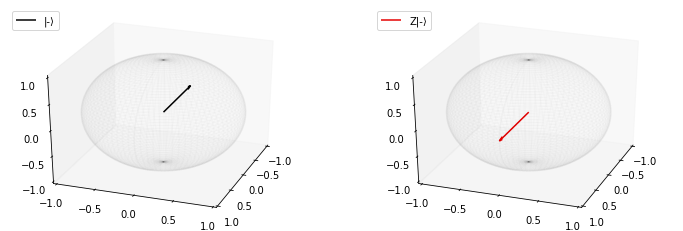

In [15]:
print("Z|+⟩ =", Z @ plus_qubit, "= |-⟩")
print("Z|-⟩ =", Z @ minus_qubit, "= |+⟩")

plot_gate(plus_qubit, '|+⟩', Z @ plus_qubit, 'Z|+⟩')
plot_gate(minus_qubit, '|-⟩', Z @ minus_qubit, 'Z|-⟩')

Z|↻⟩ = [+0.707+0.000j +0.000-0.707j] = |↺⟩
Z|↺⟩ = [+0.707+0.000j +0.000+0.707j] = |↻⟩


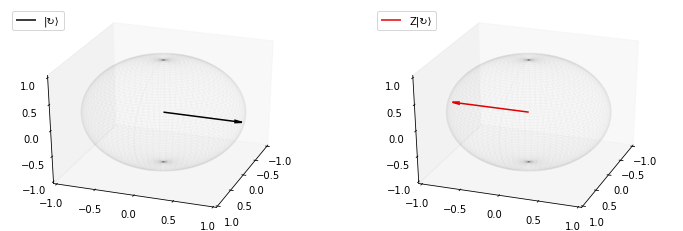

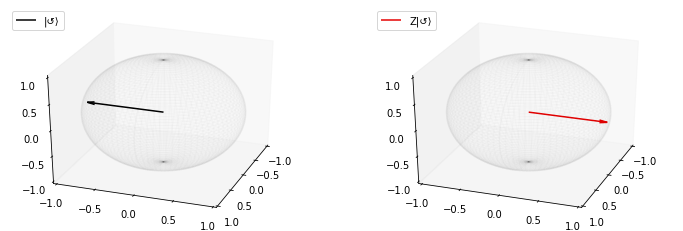

In [16]:
print("Z|↻⟩ =", Z @ cw_qubit, "= |↺⟩")
print("Z|↺⟩ =", Z @ ccw_qubit, "= |↻⟩")

plot_gate(cw_qubit, '|↻⟩', Z @ cw_qubit, 'Z|↻⟩')
plot_gate(ccw_qubit, '|↺⟩', Z @ ccw_qubit, 'Z|↺⟩')

## S GATE <a class="anchor" id="s_gate"></a>
$$
S =
\begin{bmatrix}
1 & 0\\
0 & i
\end{bmatrix}
$$

S|0⟩ = [+1.000+0.000j +0.000+0.000j] = |0⟩
S|1⟩ = [+0.000+0.000j +0.000+1.000j] = i|1⟩


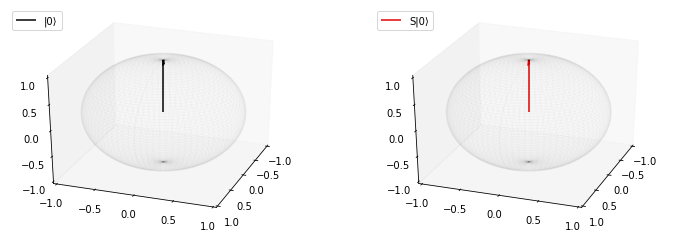

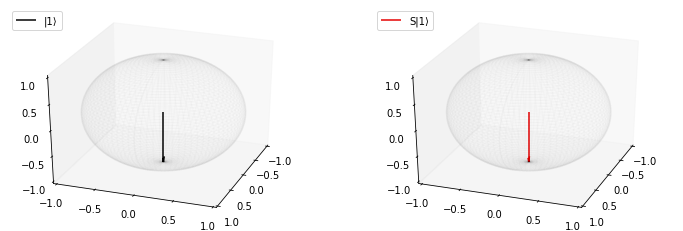

In [17]:
S = np.array([[1.0, 0.0],
              [0.0, 1.0j]], dtype=np.complex64)

print("S|0⟩ =", S @ zero_qubit, "= |0⟩")
print("S|1⟩ =", S @ one_qubit, "= i|1⟩")

plot_gate(zero_qubit, '|0⟩', S @ zero_qubit, 'S|0⟩')
plot_gate(one_qubit, '|1⟩', S @ one_qubit, 'S|1⟩')

S|+⟩ = [+0.707+0.000j +0.000+0.707j] = |↻⟩
S|-⟩ = [+0.707+0.000j +0.000-0.707j] = |↺⟩


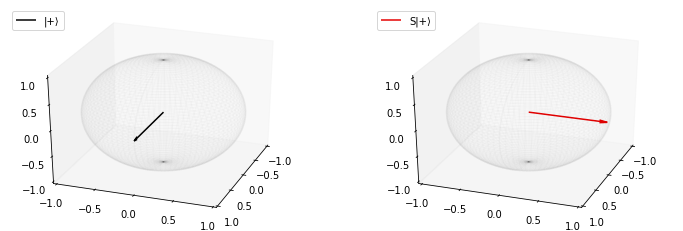

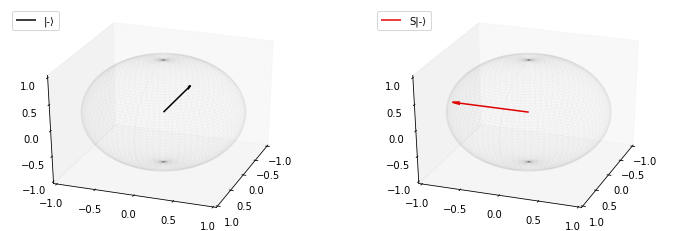

In [18]:
print("S|+⟩ =", S @ plus_qubit, "= |↻⟩")
print("S|-⟩ =", S @ minus_qubit, "= |↺⟩")

plot_gate(plus_qubit, '|+⟩', S @ plus_qubit, 'S|+⟩')
plot_gate(minus_qubit, '|-⟩', S @ minus_qubit, 'S|-⟩')

S|↻⟩ = [+0.707+0.000j -0.707+0.000j] = |-⟩
S|↺⟩ = [+0.707+0.000j +0.707+0.000j] = |+⟩


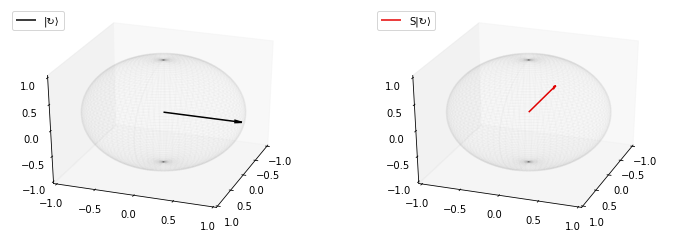

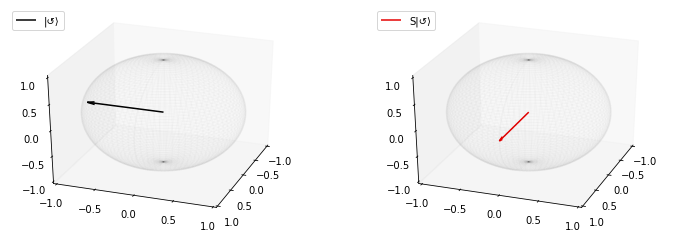

In [19]:
print("S|↻⟩ =", S @ cw_qubit, "= |-⟩")
print("S|↺⟩ =", S @ ccw_qubit, "= |+⟩")

plot_gate(cw_qubit, '|↻⟩', S @ cw_qubit, 'S|↻⟩')
plot_gate(ccw_qubit, '|↺⟩', S @ ccw_qubit, 'S|↺⟩')

## T GATE <a class="anchor" id="t_gate"></a>
$$
T =
\begin{bmatrix}
1 & 0\\
0 & e^{i\frac{\pi}{4}}
\end{bmatrix}
$$

T|0⟩ = [+1.000+0.000j +0.000+0.000j]
T|1⟩ = [+0.000+0.000j +0.707+0.707j]


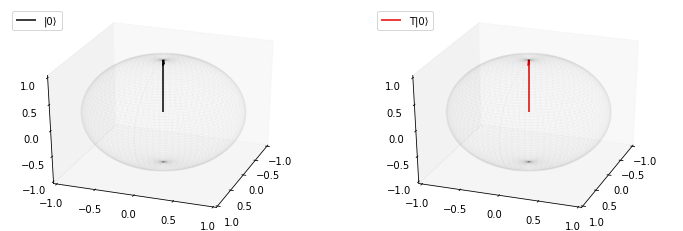

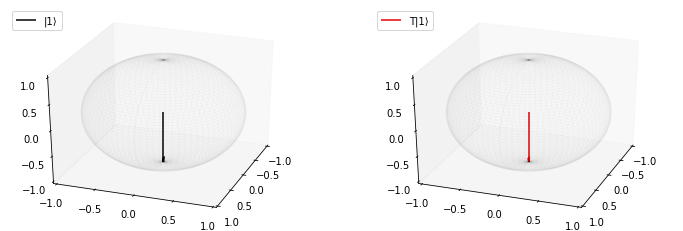

In [20]:
T = np.array([[1.0, 0.0],
              [0.0, np.e ** (1.0j * np.pi / 4.0)]], dtype=np.complex64)

print("T|0⟩ =", T @ zero_qubit)
print("T|1⟩ =", T @ one_qubit)

plot_gate(zero_qubit, '|0⟩', T @ zero_qubit, 'T|0⟩')
plot_gate(one_qubit, '|1⟩', T @ one_qubit, 'T|1⟩')

T|+⟩ = [+0.707+0.000j +0.500+0.500j]
T|-⟩ = [+0.707+0.000j -0.500-0.500j]


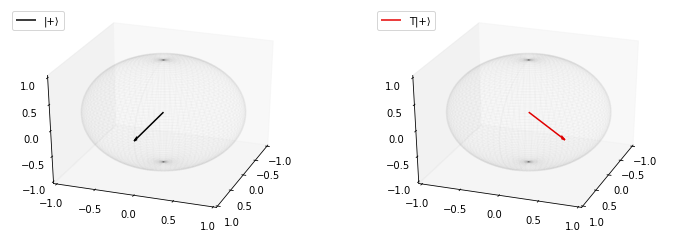

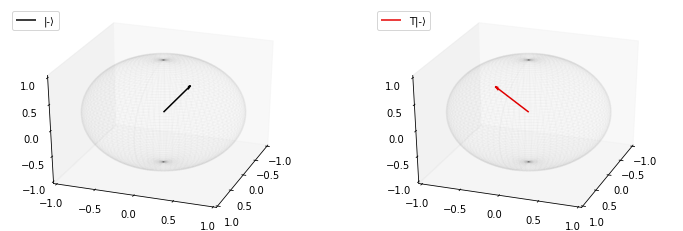

In [21]:
print("T|+⟩ =", T @ plus_qubit)
print("T|-⟩ =", T @ minus_qubit)

plot_gate(plus_qubit, '|+⟩', T @ plus_qubit, 'T|+⟩')
plot_gate(minus_qubit, '|-⟩', T @ minus_qubit, 'T|-⟩')

T|↻⟩ = [+0.707+0.000j -0.500+0.500j]
T|↺⟩ = [+0.707+0.000j +0.500-0.500j]


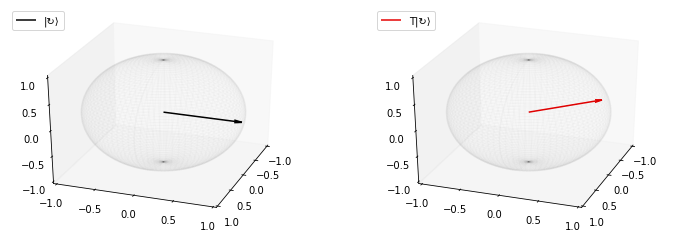

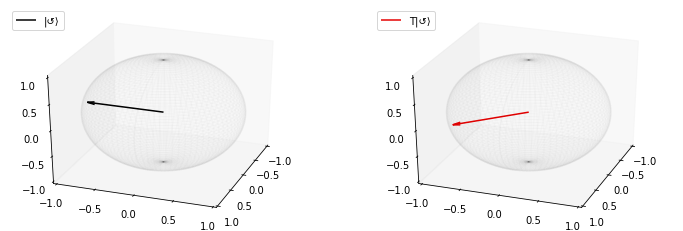

In [22]:
print("T|↻⟩ =", T @ cw_qubit)
print("T|↺⟩ =", T @ ccw_qubit)

plot_gate(cw_qubit, '|↻⟩', T @ cw_qubit, 'T|↻⟩')
plot_gate(ccw_qubit, '|↺⟩', T @ ccw_qubit, 'T|↺⟩')

## S<sup>†</sup> GATE <a class="anchor" id="sdg_gate"></a>
$$
S^{\dagger} =
\begin{bmatrix}
1 & 0\\
0 & -i
\end{bmatrix}
$$

Sdg|0⟩ = [+1.000+0.000j +0.000+0.000j] = |0⟩
Sdg|1⟩ = [+0.000+0.000j +0.000-1.000j] = -i|1⟩


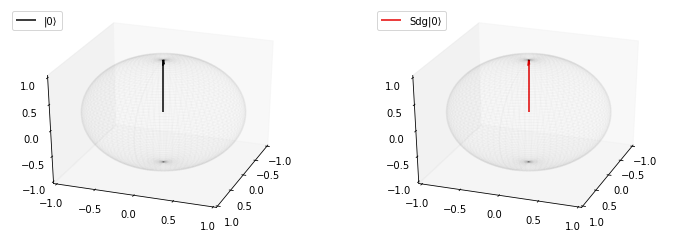

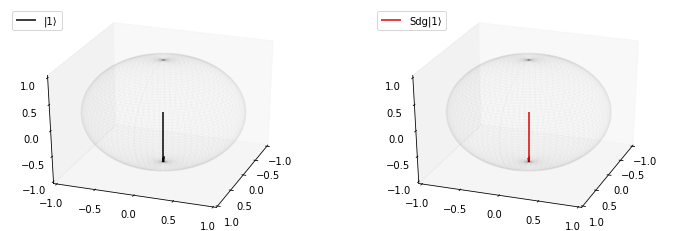

In [23]:
Sdg = np.array([[1.0, 0.0],
                [0.0, -1.0j]], dtype=np.complex64)

print("Sdg|0⟩ =", Sdg @ zero_qubit, "= |0⟩")
print("Sdg|1⟩ =", Sdg @ one_qubit, "= -i|1⟩")

plot_gate(zero_qubit, '|0⟩', Sdg @ zero_qubit, 'Sdg|0⟩')
plot_gate(one_qubit, '|1⟩', Sdg @ one_qubit, 'Sdg|1⟩')

Sdg|+⟩ = [+0.707+0.000j +0.000-0.707j] = |↺⟩
Sdg|-⟩ = [+0.707+0.000j +0.000+0.707j] = |↻⟩


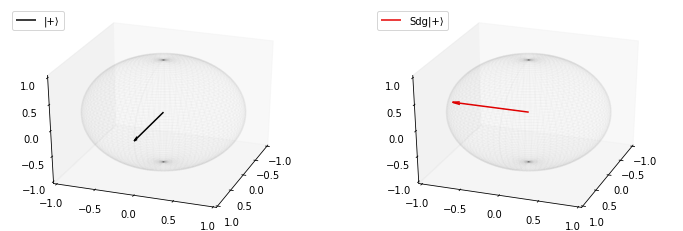

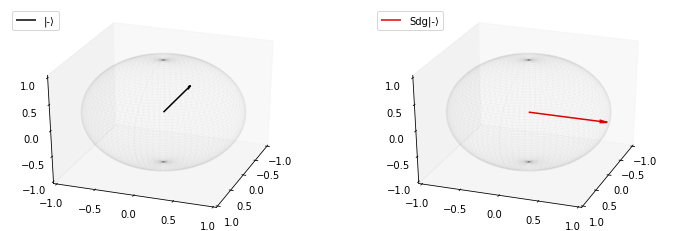

In [24]:
print("Sdg|+⟩ =", Sdg @ plus_qubit, "= |↺⟩")
print("Sdg|-⟩ =", Sdg @ minus_qubit, "= |↻⟩")

plot_gate(plus_qubit, '|+⟩', Sdg @ plus_qubit, 'Sdg|+⟩')
plot_gate(minus_qubit, '|-⟩', Sdg @ minus_qubit, 'Sdg|-⟩')

Sdg|↻⟩ = [+0.707+0.000j +0.707+0.000j] = |+⟩
Sdg|↺⟩ = [+0.707+0.000j -0.707+0.000j] = |-⟩


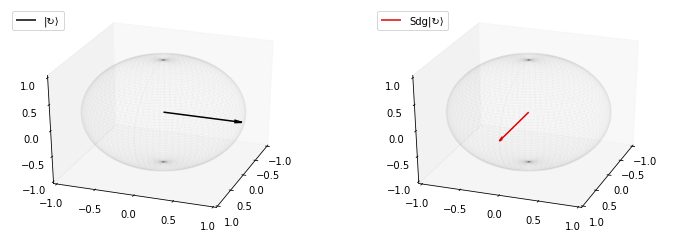

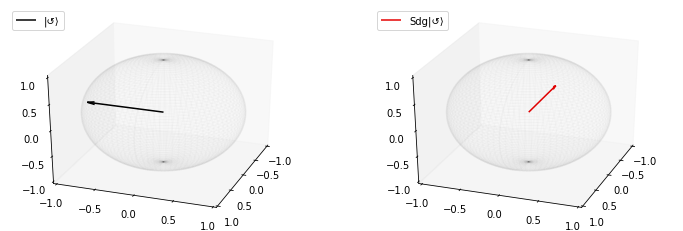

In [25]:
print("Sdg|↻⟩ =", Sdg @ cw_qubit, "= |+⟩")
print("Sdg|↺⟩ =", Sdg @ ccw_qubit, "= |-⟩")

plot_gate(cw_qubit, '|↻⟩', Sdg @ cw_qubit, 'Sdg|↻⟩')
plot_gate(ccw_qubit, '|↺⟩', Sdg @ ccw_qubit, 'Sdg|↺⟩')

## T<sup>†</sup> GATE <a class="anchor" id="tdg_gate"></a>
$$
T^{\dagger} =
\begin{bmatrix}
1 & 0\\
0 & e^{-i\frac{\pi}{4}}
\end{bmatrix}
$$

Tdg|0⟩ = [+1.000+0.000j +0.000+0.000j]
Tdg|1⟩ = [+0.000+0.000j +0.707-0.707j]


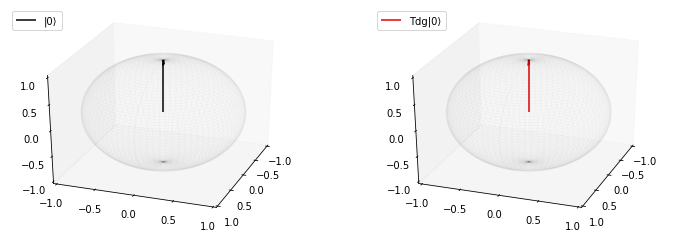

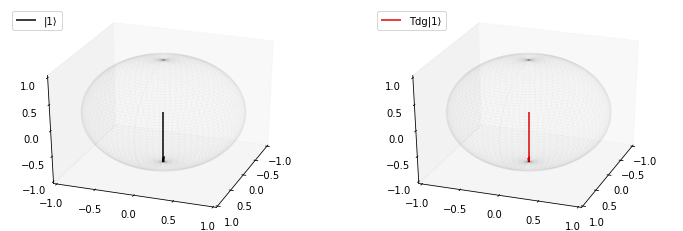

In [26]:
Tdg = np.array([[1.0, 0],
              [0, np.e ** (-1.0j * np.pi / 4.0)]], dtype=np.complex64)

print("Tdg|0⟩ =", Tdg @ zero_qubit)
print("Tdg|1⟩ =", Tdg @ one_qubit)

plot_gate(zero_qubit, '|0⟩', Tdg @ zero_qubit, 'Tdg|0⟩')
plot_gate(one_qubit, '|1⟩', Tdg @ one_qubit, 'Tdg|1⟩')

Tdg|+⟩ = [+0.707+0.000j +0.500-0.500j]
Tdg|-⟩ = [+0.707+0.000j -0.500+0.500j]


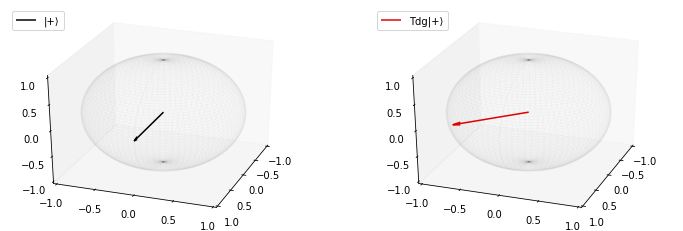

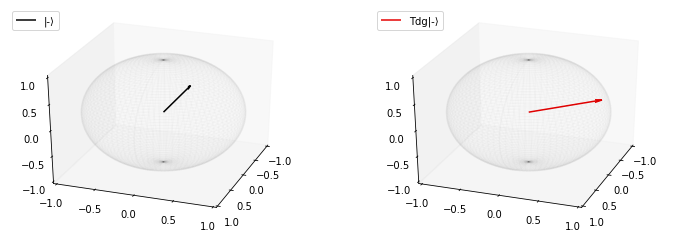

In [27]:
print("Tdg|+⟩ =", Tdg @ plus_qubit)
print("Tdg|-⟩ =", Tdg @ minus_qubit)

plot_gate(plus_qubit, '|+⟩', Tdg @ plus_qubit, 'Tdg|+⟩')
plot_gate(minus_qubit, '|-⟩', Tdg @ minus_qubit, 'Tdg|-⟩')

Tdg|↻⟩ = [+0.707+0.000j +0.500+0.500j]
Tdg|↺⟩ = [+0.707+0.000j -0.500-0.500j]


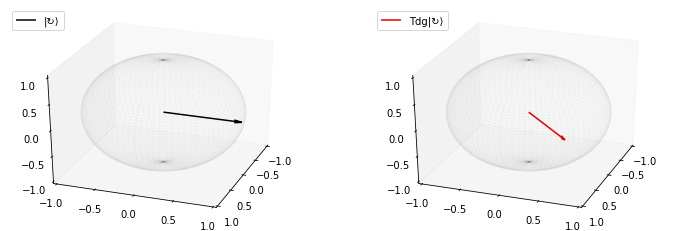

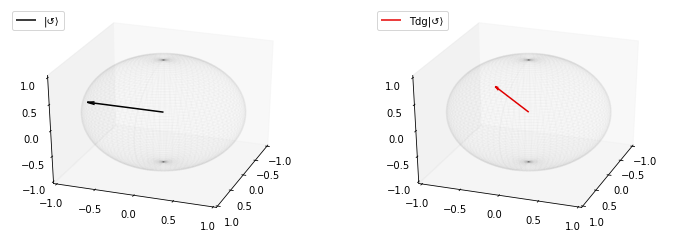

In [28]:
print("Tdg|↻⟩ =", Tdg @ cw_qubit)
print("Tdg|↺⟩ =", Tdg @ ccw_qubit)

plot_gate(cw_qubit, '|↻⟩', Tdg @ cw_qubit, 'Tdg|↻⟩')
plot_gate(ccw_qubit, '|↺⟩', Tdg @ ccw_qubit, 'Tdg|↺⟩')

Tdg|↻⟩ = [+0.707+0.000j +0.500+0.500j]
Tdg|↺⟩ = [+0.707+0.000j -0.500-0.500j]


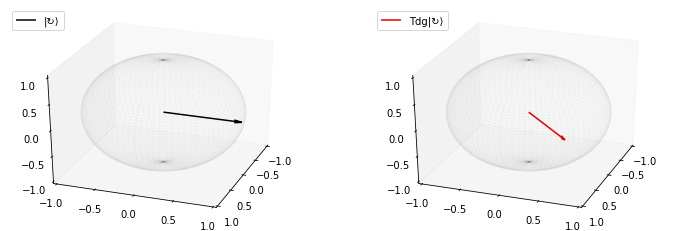

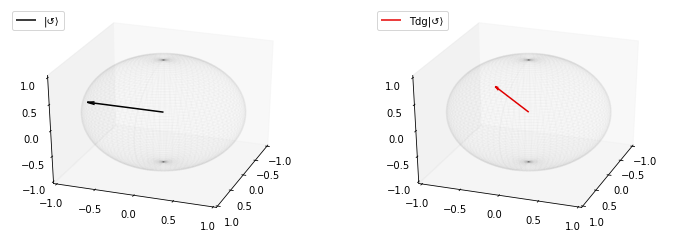

In [29]:
print("Tdg|↻⟩ =", Tdg @ cw_qubit)
print("Tdg|↺⟩ =", Tdg @ ccw_qubit)

plot_gate(cw_qubit, '|↻⟩', Tdg @ cw_qubit, 'Tdg|↻⟩')
plot_gate(ccw_qubit, '|↺⟩', Tdg @ ccw_qubit, 'Tdg|↺⟩')

## S<sup>†</sup> GATE <a class="anchor" id="sdg_gate"></a>
$$
S^{\dagger} =
\begin{bmatrix}
1 & 0\\
0 & -i
\end{bmatrix}
$$

Sdg|0⟩ = [+1.000+0.000j +0.000+0.000j] = |0⟩
Sdg|1⟩ = [+0.000+0.000j +0.000-1.000j] = -i|1⟩


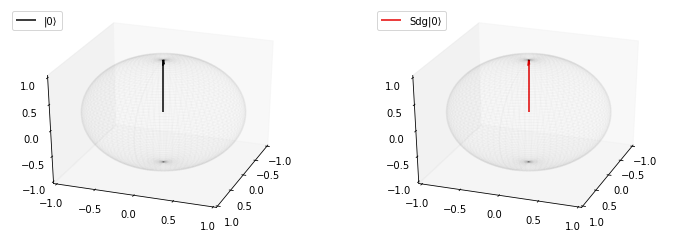

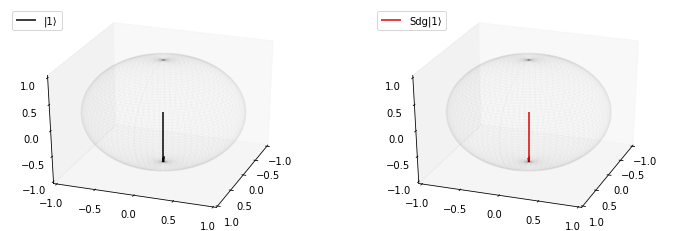

In [30]:
Sdg = np.array([[1.0, 0.0],
                [0.0, -1.0j]], dtype=np.complex64)

print("Sdg|0⟩ =", Sdg @ zero_qubit, "= |0⟩")
print("Sdg|1⟩ =", Sdg @ one_qubit, "= -i|1⟩")

plot_gate(zero_qubit, '|0⟩', Sdg @ zero_qubit, 'Sdg|0⟩')
plot_gate(one_qubit, '|1⟩', Sdg @ one_qubit, 'Sdg|1⟩')

Sdg|+⟩ = [+0.707+0.000j +0.000-0.707j] = |↺⟩
Sdg|-⟩ = [+0.707+0.000j +0.000+0.707j] = |↻⟩


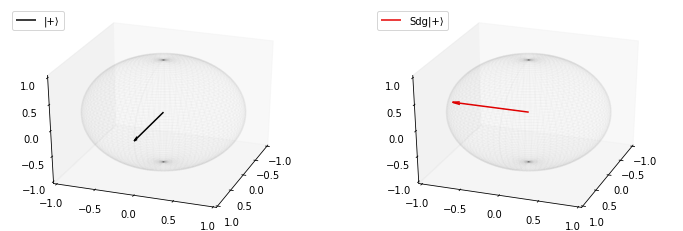

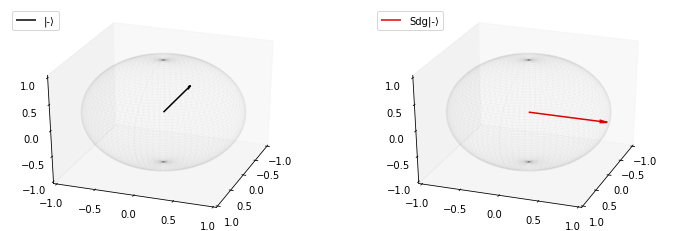

In [31]:
print("Sdg|+⟩ =", Sdg @ plus_qubit, "= |↺⟩")
print("Sdg|-⟩ =", Sdg @ minus_qubit, "= |↻⟩")

plot_gate(plus_qubit, '|+⟩', Sdg @ plus_qubit, 'Sdg|+⟩')
plot_gate(minus_qubit, '|-⟩', Sdg @ minus_qubit, 'Sdg|-⟩')

Sdg|↻⟩ = [+0.707+0.000j +0.707+0.000j] = |+⟩
Sdg|↺⟩ = [+0.707+0.000j -0.707+0.000j] = |-⟩


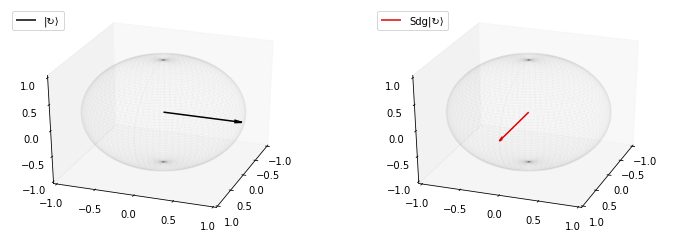

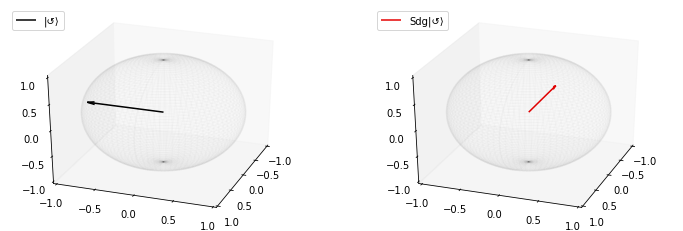

In [32]:
print("Sdg|↻⟩ =", Sdg @ cw_qubit, "= |+⟩")
print("Sdg|↺⟩ =", Sdg @ ccw_qubit, "= |-⟩")

plot_gate(cw_qubit, '|↻⟩', Sdg @ cw_qubit, 'Sdg|↻⟩')
plot_gate(ccw_qubit, '|↺⟩', Sdg @ ccw_qubit, 'Sdg|↺⟩')

## T<sup>†</sup> GATE <a class="anchor" id="tdg_gate"></a>
$$
T^{\dagger} =
\begin{bmatrix}
1 & 0\\
0 & e^{-i\frac{\pi}{4}}
\end{bmatrix}
$$

Tdg|0⟩ = [+1.000+0.000j +0.000+0.000j]
Tdg|1⟩ = [+0.000+0.000j +0.707-0.707j]


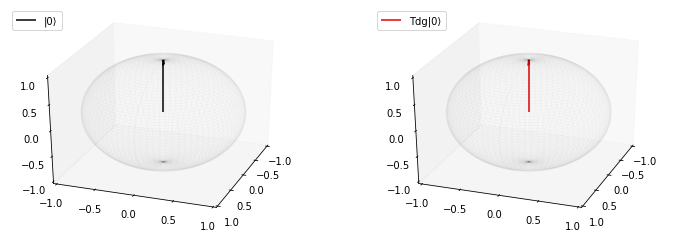

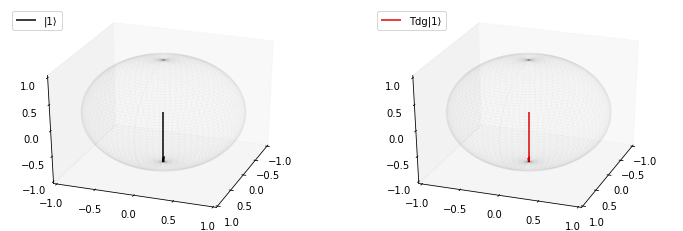

In [33]:
T = np.array([[1.0, 0],
              [0, np.e ** (-1.0j * np.pi / 4.0)]], dtype=np.complex64)

print("Tdg|0⟩ =", Tdg @ zero_qubit)
print("Tdg|1⟩ =", Tdg @ one_qubit)

plot_gate(zero_qubit, '|0⟩', Tdg @ zero_qubit, 'Tdg|0⟩')
plot_gate(one_qubit, '|1⟩', Tdg @ one_qubit, 'Tdg|1⟩')

Tdg|+⟩ = [+0.707+0.000j +0.500-0.500j]
Tdg|-⟩ = [+0.707+0.000j -0.500+0.500j]


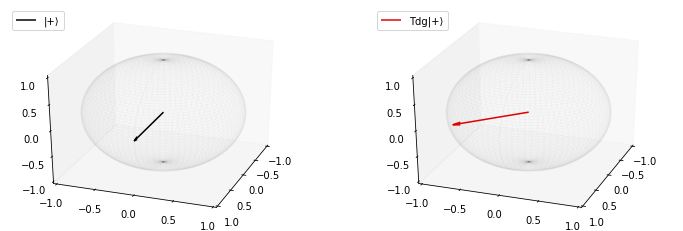

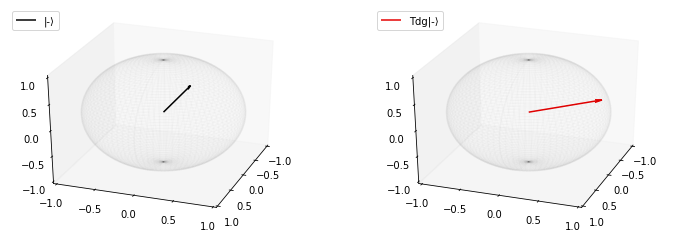

In [34]:
print("Tdg|+⟩ =", Tdg @ plus_qubit)
print("Tdg|-⟩ =", Tdg @ minus_qubit)

plot_gate(plus_qubit, '|+⟩', Tdg @ plus_qubit, 'Tdg|+⟩')
plot_gate(minus_qubit, '|-⟩', Tdg @ minus_qubit, 'Tdg|-⟩')

Tdg|↻⟩ = [+0.707+0.000j +0.500+0.500j]
Tdg|↺⟩ = [+0.707+0.000j -0.500-0.500j]


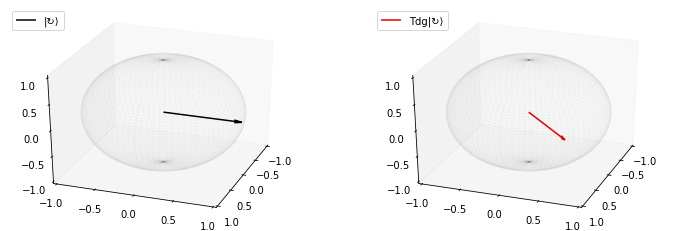

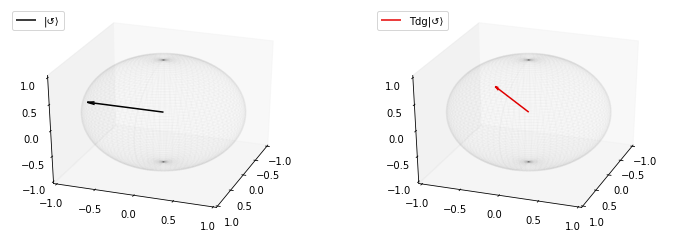

In [35]:
print("Tdg|↻⟩ =", Tdg @ cw_qubit)
print("Tdg|↺⟩ =", Tdg @ ccw_qubit)

plot_gate(cw_qubit, '|↻⟩', Tdg @ cw_qubit, 'Tdg|↻⟩')
plot_gate(ccw_qubit, '|↺⟩', Tdg @ ccw_qubit, 'Tdg|↺⟩')